<a href="https://colab.research.google.com/github/RohitAnalyst01/machine_learning_projects/blob/main/BostonHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Boston House Price Prediction Using Machine Learning Model**##

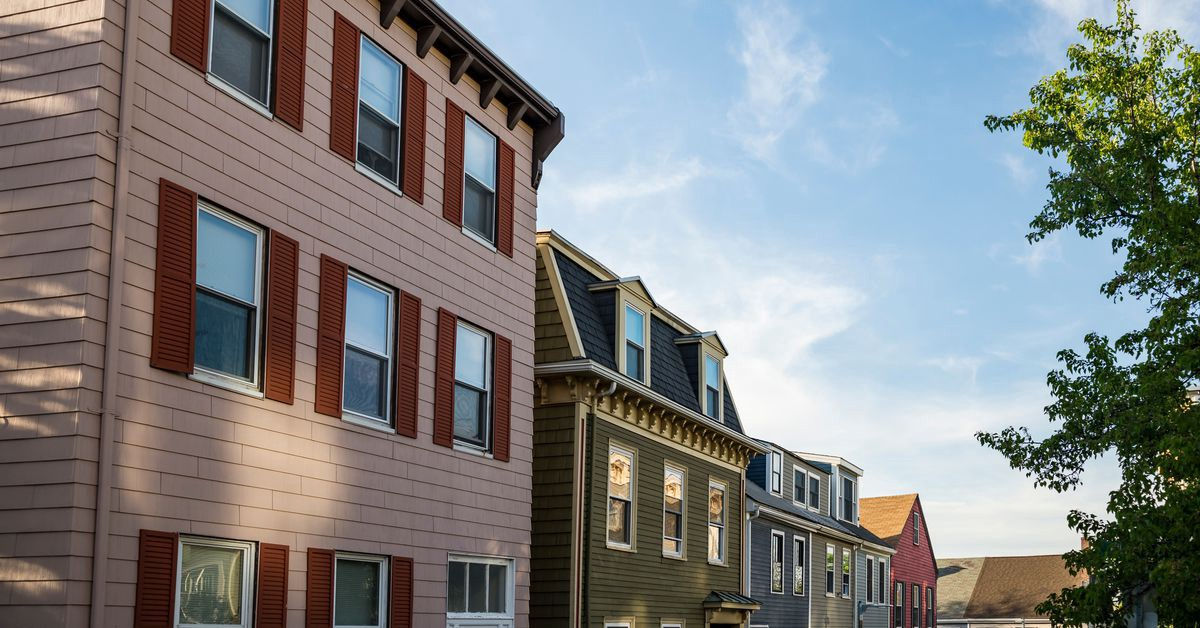


##**LOADING PACKAGES**##

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import klib

In [24]:
%matplotlib inline

##**LOADING DATASET**##

In [25]:
df = pd.read_csv('boston.csv')

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [213]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-0.918718,-0.125604,-0.595623,-0.069170,0.554770,-0.462573,68.584506,-0.320848,9.549407,407.794466,18.454743,-0.897008,12.642073,22.544980
std,0.167058,0.256807,0.279102,0.253994,0.115773,0.178157,28.127163,0.256062,8.707259,167.791388,2.154109,0.233574,7.074084,9.175344
min,-1.000000,-1.000000,-1.000000,-1.000000,0.398000,-1.000000,6.610000,-1.000000,1.000000,188.000000,13.000000,-1.000000,2.883000,7.010000
25%,-0.998345,-0.138889,-0.838645,0.000000,0.449000,-0.550852,45.025000,-0.496728,4.000000,279.000000,17.400000,-0.998270,6.950000,17.025000
50%,-0.994127,-0.000000,-0.654192,-0.000000,0.538000,-0.441944,77.500000,-0.249607,5.000000,330.000000,19.050000,-0.986006,11.360000,21.200000
75%,-0.911418,-0.000000,-0.309471,-0.000000,0.624000,-0.357179,94.075000,-0.111478,24.000000,666.000000,20.200000,-0.944838,16.955000,25.000000
max,-0.000000,-0.000000,-0.000000,-0.000000,0.871000,-0.000000,100.000000,-0.000000,24.000000,666.000000,21.200000,-0.000000,33.918500,50.000000


##**Exploratory Data Analysis**##

**Checking distributions of the data in numerical colmuns**

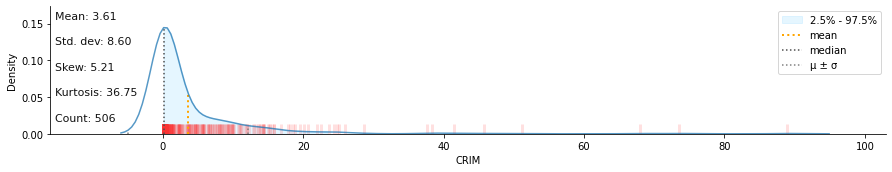

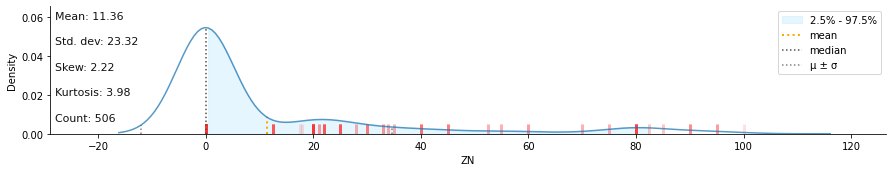

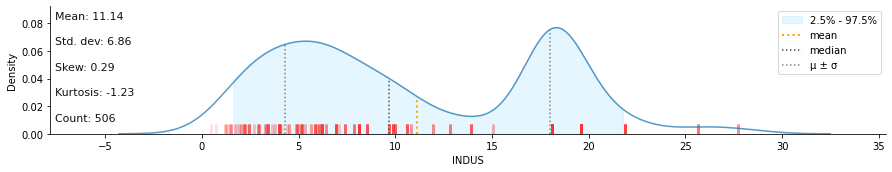

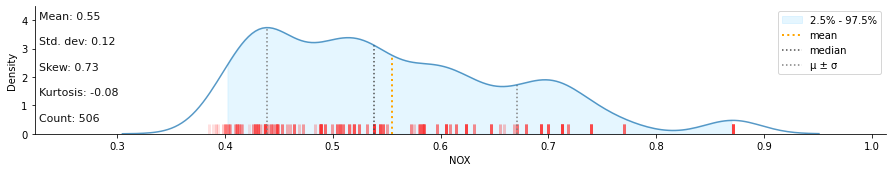

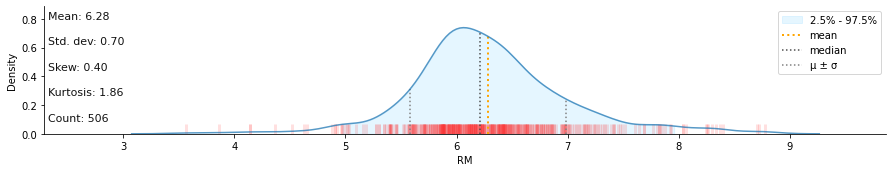

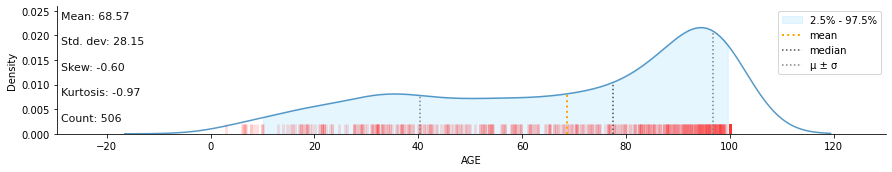

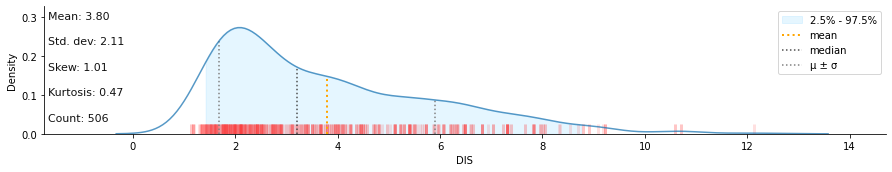

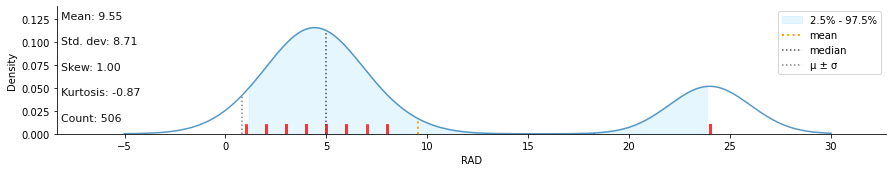

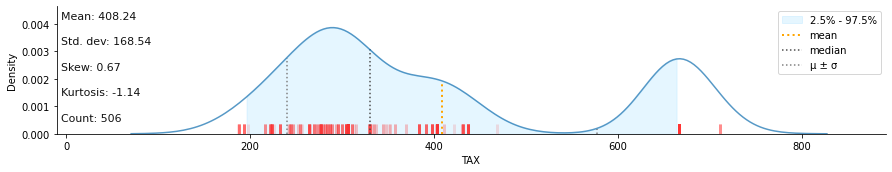

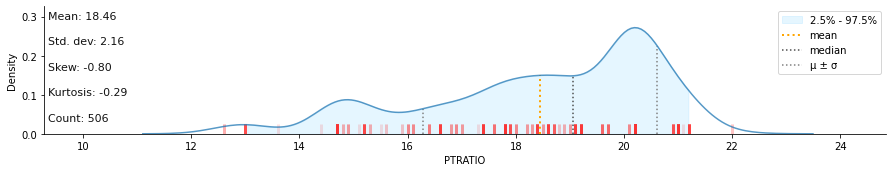

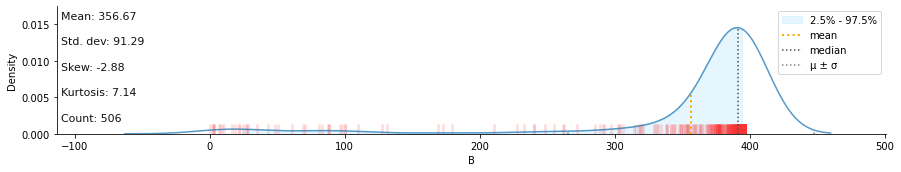

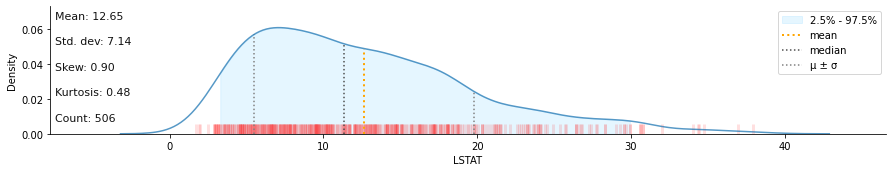

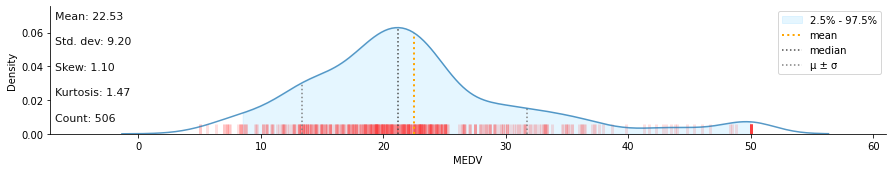

In [30]:
klib.dist_plot(df)

In [206]:
px.box(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']])

** Finding correleation with respect to target variable**

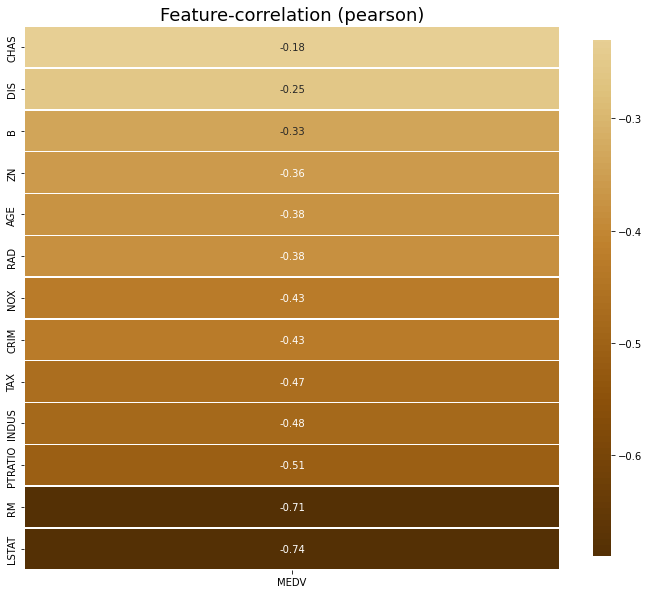

In [225]:
klib.corr_plot(df, target='MEDV') # default representation of correlations with the feature column

In [226]:
klib.corr_mat(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.23,0.48,0.06,0.49,0.27,0.40,0.44,0.72,0.68,0.33,0.44,0.53,-0.43
ZN,0.23,1.00,0.54,-0.04,0.52,0.32,0.57,0.66,0.31,0.32,0.39,0.18,0.42,-0.36
INDUS,0.48,0.54,1.00,-0.06,0.77,0.40,0.65,0.72,0.60,0.72,0.39,0.36,0.61,-0.48
CHAS,0.06,-0.04,-0.06,1.00,-0.09,0.09,-0.09,-0.10,0.01,0.04,0.12,0.05,0.05,-0.18
NOX,0.49,0.52,0.77,-0.09,1.00,0.31,0.73,0.78,0.61,0.67,0.19,0.38,0.59,-0.43
RM,0.27,0.32,0.40,0.09,0.31,1.00,0.24,0.21,0.21,0.29,0.36,0.13,0.62,-0.71
AGE,0.40,0.57,0.65,-0.09,0.73,0.24,1.00,0.76,0.46,0.51,0.26,0.27,0.61,-0.38
DIS,0.44,0.66,0.72,-0.10,0.78,0.21,0.76,1.00,0.50,0.54,0.24,0.30,0.50,-0.25
RAD,0.72,0.31,0.60,0.01,0.61,0.21,0.46,0.50,1.00,0.92,0.47,0.44,0.49,-0.38
TAX,0.68,0.32,0.72,0.04,0.67,0.29,0.51,0.54,0.92,1.00,0.46,0.44,0.54,-0.47


**Normalizing and Standardizing the correlated features**

In [209]:
#min max normalization:
cols = ['CRIM','INDUS','RM']

for col in cols:
  minimum = min(df[col])
  maximum =  max(df[col])
  df[col] = (df[col]-minimum)/(minimum - maximum)


In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
# Standardizing features

scaler = StandardScaler()

In [183]:
scaler.fit(df[cols])

StandardScaler()

In [184]:
scaled_features = scaler.transform(df[cols])

In [185]:
df_feat = pd.DataFrame(scaled_features,columns=[cols])

In [186]:
df_feat

,CRIM,INDUS,B,RM
0,0.487032,1.294970,-0.441375,0.424494
1,0.485047,0.595215,-0.441375,0.197424
2,0.485050,0.595215,-0.396671,1.323927
3,0.484314,1.314081,-0.416442,1.048199
4,0.479000,1.314081,-0.441375,1.267896
...,...,...,...,...
501,0.479930,-0.119241,-0.387445,0.451034
502,0.482445,-0.119241,-0.441375,-0.246395
503,0.480201,-0.119241,-0.441375,1.015760
504,0.473126,-0.119241,-0.403481,0.747405


##Splitting the scaled datasets into training and testing##

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X= df_feat

In [190]:
y = df['MEDV']

**Importing Linear Regression Model from sklearn**

In [191]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.4)

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
lm = LinearRegression()

**Training the Linear Regression Model**

In [194]:
lm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



LinearRegression()

Finding Intercept

In [195]:
print(lm.intercept_)

22.256231708509112


Finding Coefficient

In [196]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [197]:
coeff_df

,Coefficient
CRIM,0.835423
INDUS,1.964222
B,-1.245486
RM,5.292694


Fitting Linear Regression Model on test dataset

In [198]:
predictions = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



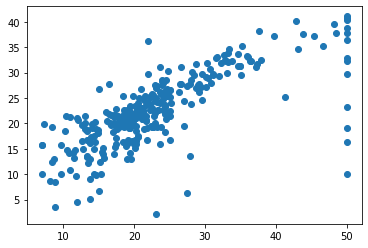

In [227]:
plt.scatter(y_test,predictions)

Plotting Residuals {(Residual = actual y value − predicted y value). Having a negative residual means that the predicted value is too high, similarly if you have a positive residual it means that the predicted value was too low. The aim of a regression line is to minimise the sum of residuals.)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



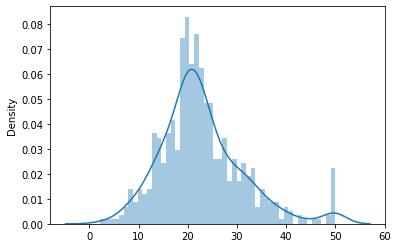

In [200]:
sns.distplot((y_test,predictions),bins=50)

**Finding the loss function by the model**

In [201]:
from sklearn import metrics 

In [210]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.113721793239748
MSE: 40.83779255441606
RMSE: 6.3904454112695515
